In [ ]:
#@title Import Sample Data Set and Relevant Libraries
#Credit: Starter Code on Kagglehub

import kagglehub
import shutil
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Download latest version
path = kagglehub.dataset_download("primaryobjects/voicegender")

print("Path to dataset files:", path)
source_dir = path  # The path where kagglehub saved files
destination_dir = "/content/sample_data"

# Move all files to sample_data
for file_name in os.listdir(source_dir):
    shutil.move(os.path.join(source_dir, file_name), destination_dir)

#Credit: Starter Code on Kagglehub
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Path to dataset files: /root/.cache/kagglehub/datasets/primaryobjects/voicegender/versions/1


In [ ]:
#@title Helper Functions for Plotting

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    nRow, nCol = int(nRow), int(nCol)
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()



In [ ]:
#Credit: Starter Code on Kagglehub
nRowsRead = None # specify 'None' if want to read whole file
# voice.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
voice = pd.read_csv(f'{destination_dir}/voice.csv', delimiter=',', nrows = nRowsRead)
voice.dataframeName = 'voice.csv'
voice = voice.dropna()
nRow, nCol = voice.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3168 rows and 21 columns


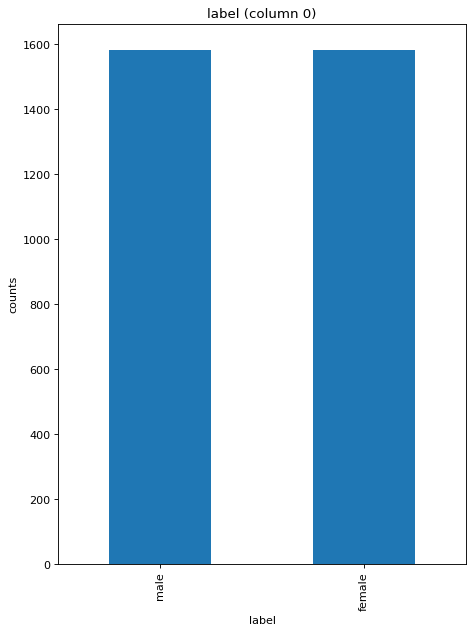

In [ ]:
plotPerColumnDistribution(voice, 1,  1)

In [ ]:
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


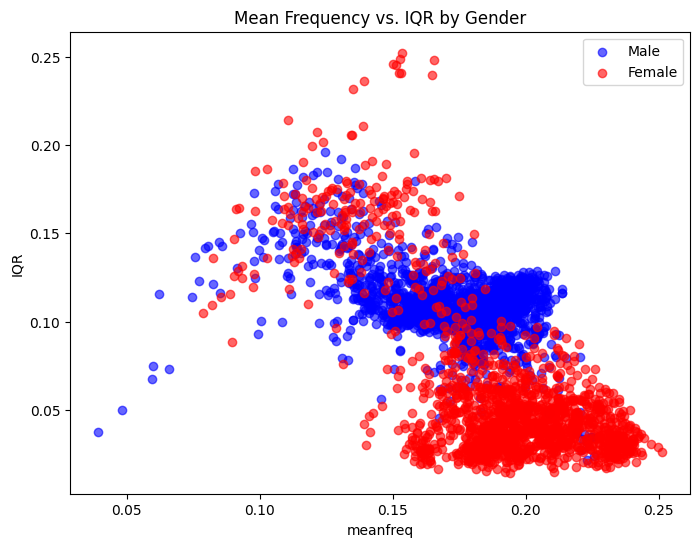

In [ ]:
#Now let's take two attributes meanfreq and iqr to visualize men vs women

male_data = voice[voice['label'] == 'male']
female_data = voice[voice['label'] == 'female']

plt.figure(figsize=(8, 6))

# Plot male in blue
plt.scatter(male_data['meanfreq'],
            male_data['IQR'],
            color='blue',
            alpha=0.6,
            label='Male')

# Plot female in red
plt.scatter(female_data['meanfreq'],
            female_data['IQR'],
            color='red',
            alpha=0.6,
            label='Female')

plt.xlabel('meanfreq')
plt.ylabel('IQR')
plt.title('Mean Frequency vs. IQR by Gender')
plt.legend()
plt.show()



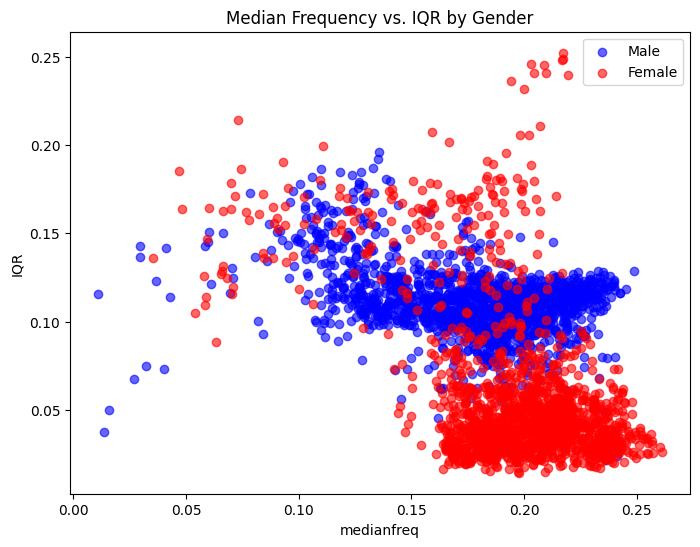

In [ ]:
#Try median and iqr to visualize men vs women

male_data = voice[voice['label'] == 'male']
female_data = voice[voice['label'] == 'female']

plt.figure(figsize=(8, 6))

# Plot male in blue
plt.scatter(male_data['median'],
            male_data['IQR'],
            color='blue',
            alpha=0.6,
            label='Male')

# Plot female in red
plt.scatter(female_data['median'],
            female_data['IQR'],
            color='red',
            alpha=0.6,
            label='Female')

plt.xlabel('medianfreq')
plt.ylabel('IQR')
plt.title('Median Frequency vs. IQR by Gender')
plt.legend()
plt.show()


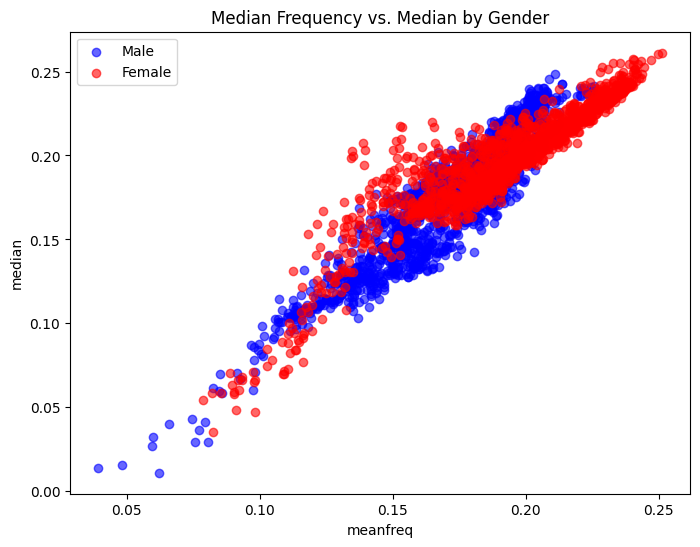

In [ ]:
#Try median and iqr to visualize men vs women

male_data = voice[voice['label'] == 'male']
female_data = voice[voice['label'] == 'female']

plt.figure(figsize=(8, 6))

# Plot male in blue
plt.scatter(male_data['meanfreq'],
            male_data['median'],
            color='blue',
            alpha=0.6,
            label='Male')

# Plot female in red
plt.scatter(female_data['meanfreq'],
            female_data['median'],
            color='red',
            alpha=0.6,
            label='Female')

plt.xlabel('meanfreq')
plt.ylabel('median')
plt.title('Median Frequency vs. Median by Gender')
plt.legend()
plt.show()

Groupings seem to be most quite explicit when using median against IQR. Let's try this combinations of attributes.

### Our goal: Find a classifer with accuracy 95%+ with total training time less than 5 seconds

## 0. Split Into Training and Test Set, Define Evaluation Metrics



In [ ]:
training_examples, testing_examples, training_labels, testing_labels = train_test_split(voice[['median','IQR']], voice['label'], test_size=0.20, random_state=42)

In [ ]:
#@title Helper Functions
def test_clf(clf, classifier_name=''):
    clf.fit(training_examples, training_labels)

    best_params = clf.best_params_
    best_training_score = clf.best_score_
    testing_score = clf.best_estimator_.score(testing_examples, testing_labels)

    print(f"{classifier_name} gives best training score of {best_training_score} "
          f"and testing score of {testing_score} with the parameters {best_params}")

def test_clf_with_logs(clf, classifier_name=''):
    clf.fit(training_examples, training_labels)

    # Get the best hyperparams, training (CV) score, and final test score
    best_params = clf.best_params_
    best_training_score = clf.best_score_
    testing_score = clf.best_estimator_.score(testing_examples, testing_labels)

    results = clf.cv_results_

    for params, mean_test_score, mean_fit_time in zip(
        results['params'],
        results['mean_test_score'],
        results['mean_fit_time']
    ):
      print(f"Params: {params}")
      print(f"  Mean CV test score: {mean_test_score:.4f}")
      print(f"  Training time: {mean_fit_time:.4f} seconds\n")
    print(f"\n{classifier_name} gives best training score of {best_training_score} "
          f"and testing score of {testing_score} with the parameters {best_params}")

def test_and_plot_clf(clf, classifier_name=''):
    start_time = time.time()
    clf.fit(training_examples, training_labels)
    end_time = time.time()
    testing_score = clf.score(testing_examples, testing_labels)

    plot(clf=clf, testing_examples=testing_examples, classifier_name=classifier_name)
    print(f"{classifier_name} gives testing score of {testing_score}")

    train_duration = end_time - start_time
    print(f"Training time: {train_duration:.4f} seconds")

def test_and_display_time(clf, classifier_name=''):
    start_time = time.time()
    clf.fit(training_examples, training_labels)
    end_time = time.time()
    testing_score = clf.score(testing_examples, testing_labels)

    print(f"{classifier_name} gives testing score of {testing_score}")

    train_duration = end_time - start_time
    print(f"Training time: {train_duration:.4f} seconds")

def test_clf_with_timeseries(clf, classifier_name=''):
    clf.fit(training_examples, training_labels)

    # Get the best hyperparams, training (CV) score, and final test score
    best_params = clf.best_params_
    best_training_score = clf.best_score_
    testing_score = clf.best_estimator_.score(testing_examples, testing_labels)

    results = clf.cv_results_

    # Extract max_depth and mean CV scores
    max_depths = results['param_max_depth'].data  # or just `results['param_max_depth']`
    mean_scores = results['mean_test_score']

    plt.figure(figsize=(8, 6))
    plt.plot(max_depths, mean_scores, marker='o', linestyle='--')
    plt.xlabel('max_depth')
    plt.ylabel('Mean CV test score')
    plt.title('Effect of max_depth on Mean CV Test Score')
    plt.grid(True)
    plt.show()
    print(f"\n{classifier_name} gives best training score of {best_training_score} "
          f"and testing score of {testing_score} with the parameters {best_params}")


def plot(clf, testing_examples, classifier_name=''):
    X1 = testing_examples.iloc[:, 0]
    X2 = testing_examples.iloc[:, 1]

    X1_min, X1_max = min(X1) - 0.05, max(X1) + 0.05
    X2_min, X2_max = min(X2) - 0.05, max(X2) + 0.05

    X1_inc = (X1_max - X1_min) / 200.0
    X2_inc = (X2_max - X2_min) / 200.0

    X1_surf = np.arange(X1_min, X1_max, X1_inc)
    X2_surf = np.arange(X2_min, X2_max, X2_inc)
    X1_surf, X2_surf = np.meshgrid(X1_surf, X2_surf)

    mesh_df = pd.DataFrame(
        np.c_[X1_surf.ravel(), X2_surf.ravel()],
        columns=testing_examples.columns[:2]
    )

    L_surf_str = clf.predict(mesh_df)


    label_map = {'male': 0, 'female': 1}
    L_surf_num = np.array([label_map[label] for label in L_surf_str])
    L_surf_num = L_surf_num.reshape(X1_surf.shape)

    plt.title(classifier_name)
    plt.xlabel(testing_examples.columns[0])
    plt.ylabel(testing_examples.columns[1])

    plt.contourf(X1_surf, X2_surf, L_surf_num, cmap=plt.cm.coolwarm, zorder=1)

    color_map = {'male': 'blue', 'female': 'red'}
    colors = [color_map[label] for label in testing_labels]

    plt.scatter(X1, X2, s=38, c=colors)

    plt.margins(0.0)
    plt.show()

In [ ]:
training_examples

,median,IQR
807,0.189474,0.071579
2495,0.203955,0.037437
2529,0.201869,0.061682
2241,0.102197,0.155057
2981,0.163096,0.109681
...,...,...
3092,0.169427,0.026573
1095,0.217333,0.108889
1130,0.221946,0.127273
1294,0.192037,0.101897


In [ ]:
testing_examples

,median,IQR
2148,0.184325,0.030777
1124,0.195537,0.104904
170,0.174299,0.156416
3158,0.182534,0.051166
2229,0.210805,0.042241
...,...,...
3007,0.169801,0.063383
912,0.224926,0.116838
533,0.128703,0.114918
857,0.186290,0.094274


# 1. Optimization Through k-NN/Ensembling Techniques

## 1-1. Nearest Neighbors

Let's implement a simple K-NN to see how this performs.

In [ ]:
param_grid = {
    'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'leaf_size' : [2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 25]}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)
test_clf(grid_search,  'KNeighborsClassifier')


KNeighborsClassifier gives best training score of 0.9226489229833712 and testing score of 0.9258675078864353 with the parameters {'leaf_size': 2, 'n_neighbors': 11}


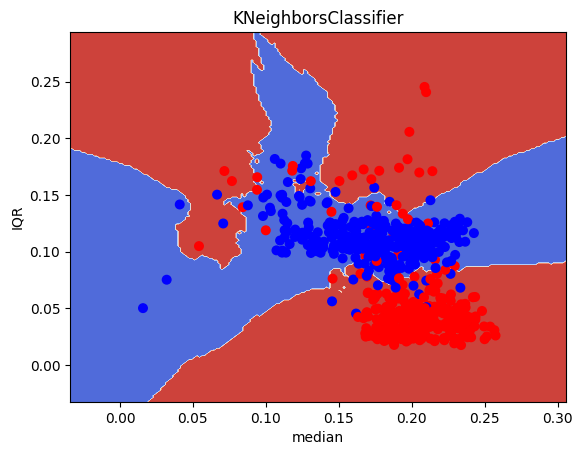

KNeighborsClassifier gives testing score of 0.9258675078864353
Training time: 0.0118 seconds


In [ ]:
#Let's learn with the best parameters and plot the results.
knn2 = KNeighborsClassifier(leaf_size=2, n_neighbors = 11)
test_and_plot_clf(knn2, 'KNeighborsClassifier')


## 1-2. Random Forest

In [ ]:
param_grid = {
            'n_estimators' : [10, 50, 100, 500],
            'max_depth' : [3],
            'min_samples_split' : [2, 3, 4, 5],
            'criterion' : ['gini', 'entropy', 'log_loss']}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)
test_clf(grid_search, 'RandomForestClassifier')

RandomForestClassifier gives best training score of 0.9131838061603947 and testing score of 0.9242902208201893 with the parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


One question: given criterion of gini index, 'min_samples_split' at 2, and n_estimators at 100, what relationship does max_depth have with test accuracy?

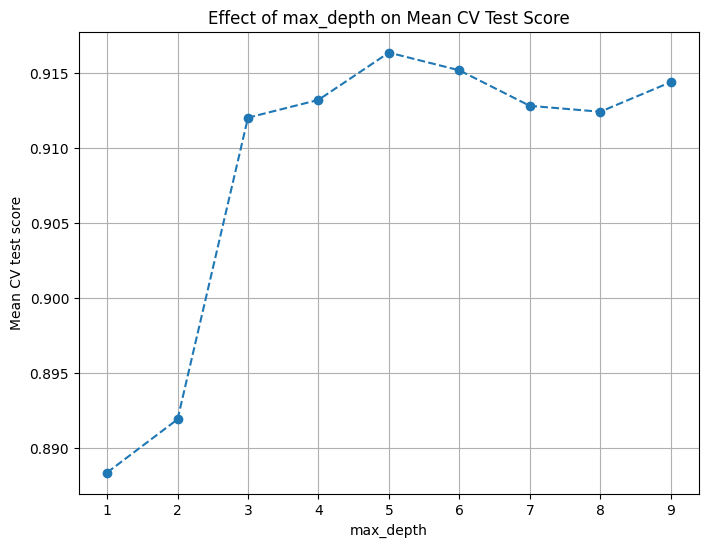


RandomForestClassifier gives best training score of 0.9163396247008286 and testing score of 0.9258675078864353 with the parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}


In [ ]:
param_grid = {
            'n_estimators' : [100],
            'max_depth' : [1,2,3,4,5,6,7,8,9],
            'min_samples_split' : [3],
            'criterion' : ['gini']}

rfc2 = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)
test_clf_with_timeseries(grid_search, 'RandomForestClassifier')

We can see that increasing the max_depth beyond 5 gives us diminishing returns.

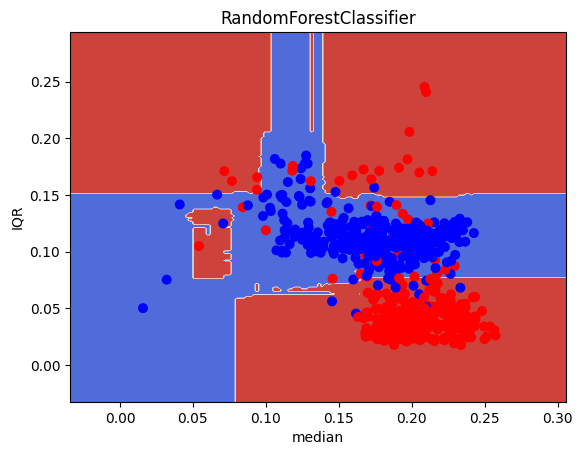

RandomForestClassifier gives testing score of 0.9258675078864353
Training time: 0.3312 seconds


In [ ]:
rfc3 = RandomForestClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 3, n_estimators = 100)
test_and_plot_clf(rfc3, 'RandomForestClassifier')

## 1-3. AdaBoost

In [ ]:
params = {
        'n_estimators' : [10, 50 ,100, 250, 500, 1000]}
adac = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=adac, param_grid=params, cv=5, scoring='accuracy', refit=True)
test_clf(grid_search, 'AdaBoostClassifier')

AdaBoostClassifier gives best training score of 0.9139727607955035 and testing score of 0.9132492113564669 with the parameters {'n_estimators': 250}


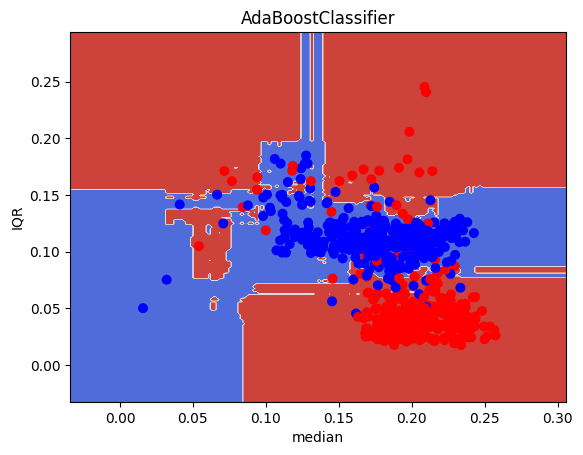

AdaBoostClassifier gives testing score of 0.916403785488959
Training time: 1.0421 seconds


In [ ]:
adac2 = RandomForestClassifier(n_estimators = 250)
test_and_plot_clf(adac2, 'AdaBoostClassifier')

Optimizing parameters for these methods do not seem to be giving us satisfying results. How should we proceed from here?

# 2. Explore Multidimensionality

Let's begin by loading in more dimensions to our dataset.

In [ ]:
training_examples, testing_examples, training_labels, testing_labels = train_test_split(voice[['meanfreq', 'meanfun', 'maxfun', 'sp.ent', 'sfm']], voice['label'], test_size=0.20, random_state=42)
training_examples.describe()

,meanfreq,meanfun,maxfun,sp.ent,sfm
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,0.180852,0.143068,0.258890,0.894964,0.408083
std,0.030010,0.032123,0.029996,0.045144,0.177561
min,0.039363,0.055565,0.108696,0.738651,0.036876
25%,0.163721,0.117824,0.253968,0.861742,0.257480
50%,0.184850,0.141435,0.271186,0.901184,0.396411
75%,0.199118,0.169669,0.277457,0.928623,0.534193
max,0.251124,0.237636,0.279114,0.981997,0.842936


Notice how our variables are not normalized. Let's do this before we feed this data into the learning algorithms

##2.1 Normalization

In [ ]:
scaler = StandardScaler()
scaler.fit(training_examples)
training_examples_scaled = scaler.transform(training_examples)
training_examples = pd.DataFrame(training_examples_scaled, columns=training_examples.columns)
testing_examples_scaled = scaler.transform(testing_examples)
testing_examples = pd.DataFrame(testing_examples_scaled, columns=testing_examples.columns)

training_examples.describe()

,meanfreq,meanfun,maxfun,sp.ent,sfm
count,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03
mean,4.185024e-16,3.715348e-17,-1.121614e-16,8.731067e-16,-3.112480e-16
std,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00
min,-4.715661e+00,-2.724518e+00,-5.008114e+00,-3.463211e+00,-2.090992e+00
25%,-5.709699e-01,-7.859991e-01,-1.641020e-01,-7.360530e-01,-8.483415e-01
50%,1.332607e-01,-5.085353e-02,4.100262e-01,1.378083e-01,-6.574550e-02
75%,6.087839e-01,8.282790e-01,6.191018e-01,7.457371e-01,7.103732e-01
max,2.342078e+00,2.944533e+00,6.743625e-01,1.928253e+00,2.449513e+00


## 2-2. Retry Nearest Neighbors

In [ ]:
param_grid = {
    'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'leaf_size' : [2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 25]}

KNN = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)
test_clf(grid_search,  'KNeighborsClassifier')

KNeighborsClassifier gives best training score of 0.9640885313126116 and testing score of 0.9574132492113565 with the parameters {'leaf_size': 2, 'n_neighbors': 7}


In [ ]:
KNN2 = KNeighborsClassifier(leaf_size=2, n_neighbors = 7)
test_and_display_time(KNN2, 'KNeighborsClassifier')

KNeighborsClassifier gives testing score of 0.9574132492113565
Training time: 0.0109 seconds


### Goal Accomplished!
Now let's try to further improve our classifier with other methods.

## 2.3 Random Forest

In [ ]:
param_grid = {
            'n_estimators' : [10, 50, 100],
            'max_depth' : [3,4,5],
            'min_samples_split' : [2, 3, 5],
            'criterion' : ['gini']}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='accuracy', refit=True)
test_clf(grid_search, 'RandomForestClassifier')

RandomForestClassifier gives best training score of 0.9601468765348363 and testing score of 0.9495268138801262 with the parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
RFC2 = RandomForestClassifier(criterion = 'gini', max_depth = 5, n_estimators = 10 )
test_and_display_time(RFC2, 'KNeighborsClassifier')

KNeighborsClassifier gives testing score of 0.9558359621451105
Training time: 0.0773 seconds


# 3. Conclusion


We have found our binary classifier that fits the program specs!

---

